# Chapter 2, First-order Differential Equaitons

## 2.1 Linear Differential Equations; Method of Integrating Factors

이 Chapter에서는 Integrating Factors를 통해 구하는 해를 구하는 방법에 대해 다룹니다. 하지만 sympy를 이용하면 integrating Factor 부분을 skip하고 해를 구하기에, Integrating factor를 직접 구하는 프로그램을 구현해보겠습니다.

In [26]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing

init_printing(use_latex='mathjax')

t = sy.symbols('t')
f = sy.Function('f')
y = f(t)
eq = sy.Eq(t*sy.diff(y, t, 1) + 2 * y - 4 *(t**2),0)


initial_t = 1
initial_y = 2
#입력 받는 것으로 변경 가능

# 초기 조건: f(1) = 2 (예시로 지정)
initial_condition = {f(initial_t): initial_y}

sol = sy.dsolve(eq, y, ics=initial_condition)

print("solution : ", end = "")
sol.rhs


solution : 

 4    
t  + 1
──────
   2  
  t   

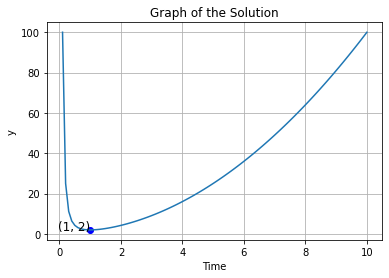

In [27]:

# 해결된 결과 중에서 식 부분만 추출
sym_sol = sol.rhs

# SymPy 식을 NumPy 함수로 변환
num_sol = sy.lambdify(t, sym_sol, 'numpy')

# 그래프를 그리기 위한 t 값 배열 생성
t_values = np.linspace(0.1, 10, 100)

# t 값에 따른 y 값을 계산
y_values = num_sol(t_values)



# 그래프 그리기
plt.scatter(initial_t, initial_y, color='blue', marker='o')
plt.text(initial_t, initial_y, f'({initial_t}, {initial_y})', fontsize=12, ha='right')
plt.plot(t_values, y_values)
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Graph of the Solution')
plt.grid(True)
plt.show()


여기서 Integrating Factor에 대해서 다루어 보겠습니다.

$\frac{{dy}}{{dt}} + p(t) y = g(t)$인 경우에

$\text{{Integrating Factor}} = e^{\int p(t) \, dt}$ 임을 이용하겠습니다.

In [2]:
import sympy as sy
from sympy import init_printing

init_printing(use_latex='mathjax')

t = sy.symbols('t')
f = sy.Function('f')
y = f(t)
eq = sy.Eq(t* sy.diff(y, t, 1) + 2 * y, 4 * t**2)

# dy/dt의 계수를 구함
coeff_dydt = eq.lhs.coeff(sy.diff(f(t), t, 1)) - eq.rhs.coeff(sy.diff(f(t), t, 1))

# y의 계수를 구함
coeff_y = eq.lhs.coeff(f(t)) - eq.rhs.coeff(f(t))


if coeff_dydt == 0:
    print("There is no Integrating_factor")
else:
    # 계수들로 통합 인자 계산
    integrating_factor = sy.exp(sy.integrate(coeff_y / coeff_dydt, t))
    display(sy.Eq(sy.Symbol("\\text{integrating_factor}"), integrating_factor))

                             2
\text{integrating_factor} = t 

## 2.2 Seperable Differential Equations

Separable Differential Equations는 비선형 미분 방정식으로 Sympy로 푸는데 한계가 있음을 알았습니다.

더 조사해보니 대수적인 해를 구하는 것은 힘들고, Scipy라는 프로그램을 이용하면 수치적으로 구할 수 있다는 것을 알았습니다. 

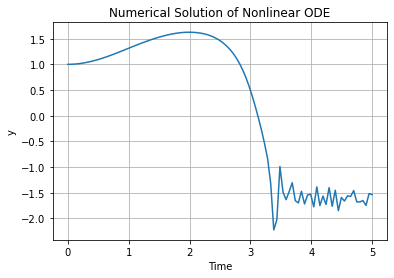

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def func(t, y):
    dydt = (4 * t - t**3) / (4 + y**3)
    return dydt

t_span = (0, 5)
y0 = [1]

sol = solve_ivp(func, t_span, y0, t_eval=np.linspace(0, 5, 100))

plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Numerical Solution of Nonlinear ODE')
plt.grid(True)
plt.show()


## 2.3 Modeling with First-Order Linear Differential Equations

이 Chapter는 공학적인 환경에서 미분방정식을 이용해 모델링하고, 그 해를 찾아내는 것에 대해 다룹니다. 위의 코드들과 크게 다른 점이 없기에 skip하겠습니다.

## 2.4 Differences Between Linear and Nonlinear Differential Equations

해의 존재성, 유일성에 관한 증명 Chapter이기에 skip하겠습니다.

## 2.5 Autonomous Differential Equations and Population Dynmaics

역시나 Expotential Growth, logistic equation 등 First-order Differential Equations의 모델링에 다루기에 skip하겠습니다

## 2.6 Exact Differential Equations and Integrating Factors

이 chapter에서는 Exact Differential Equation의 해의 유일성, 존재성, 그에 따른 Integrating factor를 구하는 방법에 대해 다룹니다. 

Chapter 2.1처럼 해를 구하고 수식을 이용하여 Integrating Factor를 구해보겠습니다.

In [74]:
import sympy as sy

f = sy.Function('f')
x = sy.symbols('x')
y = f(x)
z = sy.symbols('z')

eq = sy.Eq(3*(x**2)*y - sy.cos(x) + (x**3 - sy.sin(y))*sy.diff(y, x, 1), 0)

eq = eq.lhs - eq.rhs

print(eq)

N = eq.lhs.coeff(sy.diff(y, x, 1))
M = sy.Eq(eq - N*sy.diff(y, x, 1))

print(N)
print(M)

My = sy.diff(M, y)
Nx = sy.diff(N, x)

is_exact = Nx.eqauls(My)

if is_exact:
    print("The equation is an Exact Differential Equation")
    
    # Define the potential function
    g, y_sol = sy.symbols('g y_sol', cls=sy.Function)
    potential_function = sy.integrate(N, x) + g(y)
    
    # Solve for g(y)
    g_sol = sy.dsolve(potential_function.diff(y) - M, g(y))
    
    # Solve for y as a function of x
    y_solutions = sy.solve(g_sol, y)
    
    print("Exact solution:")
    for y_sol in y_solutions:
        print(f"y = {y_sol}")
else:
    print("The equation is not an Exact Differential Equation")


3*x**2*f(x) + (x**3 - sin(f(x)))*Derivative(f(x), x) - cos(x)


AttributeError: 'Add' object has no attribute 'lhs'